# Importing libraries & Reading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Copy of Startups1.csv")

# Data Exploring

In [ ]:
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,101-250,89506451,10,20
2,2,Paytm,Noida,2010,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,1001-5000,366600000,7,29


**columns describtion**

* company**:**describes company name
* city**:**This column contains the city where the company is located

* Starting Year**:** the year when each company was established
* No. of Employees**:**the number of employees working in each company

* Funding Amount in USD:**Total** the funding amount that each company has received
* Funding Rounds**:**the funding amount that each company has received

* No. of Investors**:**the count of investors who have participated in funding the company




In [ ]:
df.shape

(300, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   No. of Employees     300 non-null    object
 5   Funding Amount in $  300 non-null    int64 
 6   Funding Round        300 non-null    int64 
 7   No. of Investors     300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


# Data preprocessing

In [ ]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', 'Nov-50',
       '251-500', '10001+', '51-100', '1-Oct', 'Not Available'],
      dtype=object)

In [ ]:
df = df[df['No. of Employees'] != '1-Oct']
df = df[df['No. of Employees'] != 'Not Available']
df = df[df['No. of Employees'] != 'Nov-50']

In [ ]:
df['No. of Employees'].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', '251-500',
       '10001+', '51-100'], dtype=object)

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Encoding**

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

1:company

In [ ]:
df['Company']= label_encoder.fit_transform(df['Company'])

df['Company'].unique()

array([212,  36, 145,   4, 168, 210,  44,  16,  73, 208, 140, 110,  25,
        35, 153,  47,  77,  76, 100, 241,  92,  49,  12,  29, 119,  26,
        24,  14, 166, 171, 230, 158, 172, 114, 103, 236,  63, 123,  42,
        94, 228, 133, 202, 127, 235, 191, 223,  27, 157,  83,  54,  28,
       135,  91, 149, 181, 201,   0, 185, 148, 237, 134, 132, 152, 138,
       104, 211, 199, 232,  38, 112, 170, 192,  43, 116,   6, 204, 229,
       213, 143, 147, 139, 162, 128,  19, 220,  67,  86, 242,  95, 234,
       177, 224,  61,  45,  11, 175,  70,  57, 239, 120, 108,  34, 206,
        51,  15, 219, 183, 107,  59, 164, 194, 160,  21, 155, 106, 218,
        46,  68, 197, 203,  99, 240,  93, 156, 196, 193,  80, 150, 169,
        82, 124, 217, 130, 227, 141,   1,  22,  52,  10, 238, 188,  33,
         7,  64,  72,  84, 226, 173, 176, 233, 215,  39,  13,  78,  62,
        74, 190,  56, 186,   2,  48,  23,  31,  41, 187, 113,   9,  20,
        89, 184, 102, 117,  58,  75,  65,  81, 179, 205,  40,  5

2:city

In [ ]:
df['City']= label_encoder.fit_transform(df['City'])

df['City'].unique()

array([ 7, 16, 14,  3, 13,  9, 15, 22, 19,  4,  1,  5, 18,  6,  0,  8, 21,
       12, 20, 23, 11,  2, 17, 10])

3:no of employees

In [ ]:
df['No. of Employees']= label_encoder.fit_transform(df['No. of Employees'])

df['No. of Employees'].unique()

array([1, 2, 5, 4, 3, 0, 6])

**outliers**

In [ ]:
columns = df.columns

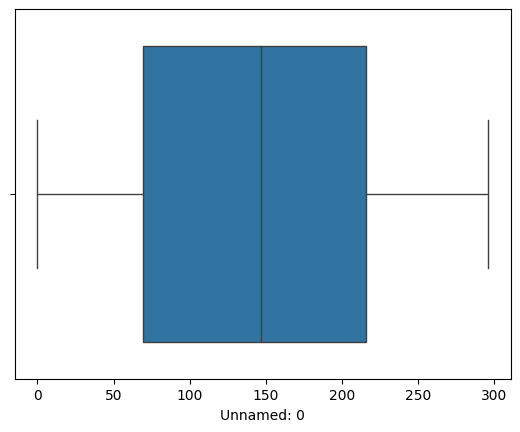

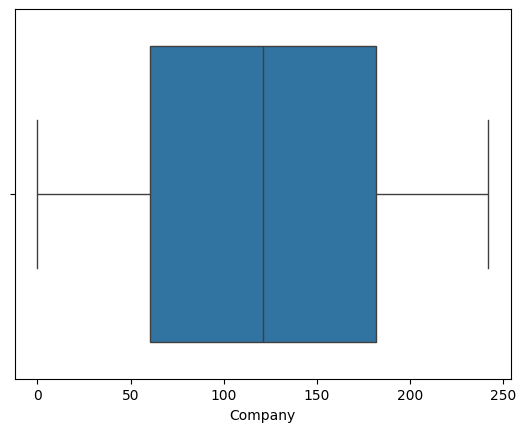

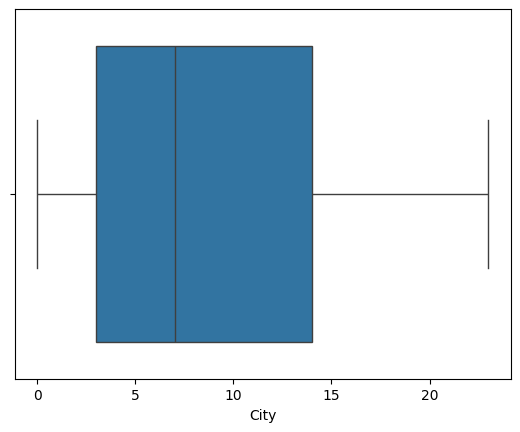

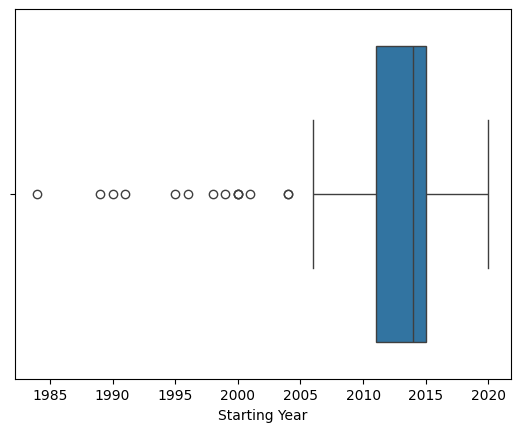

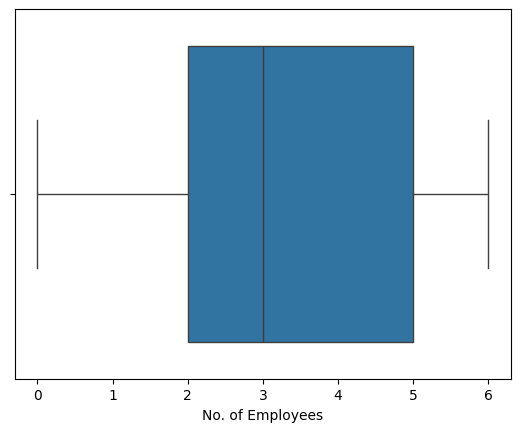

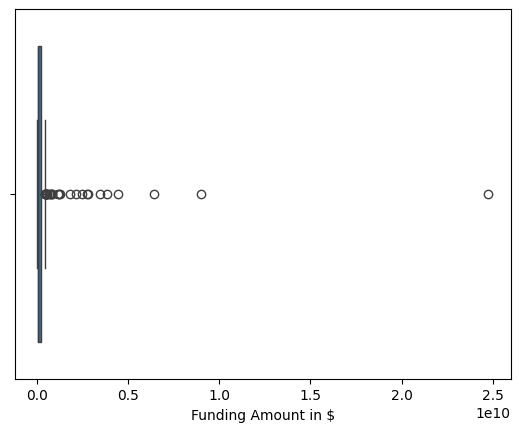

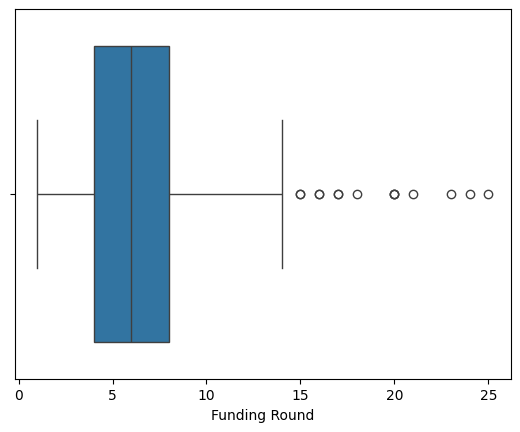

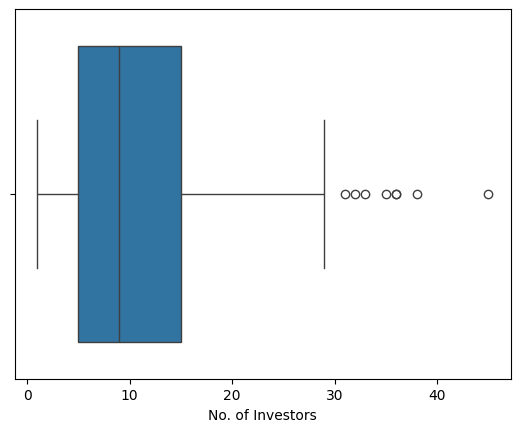

In [ ]:
# box plot to check outliers
for col in columns:
    if not (df[col].dtype == 'object'):
        sns.boxplot(x=df[col])
        plt.show()

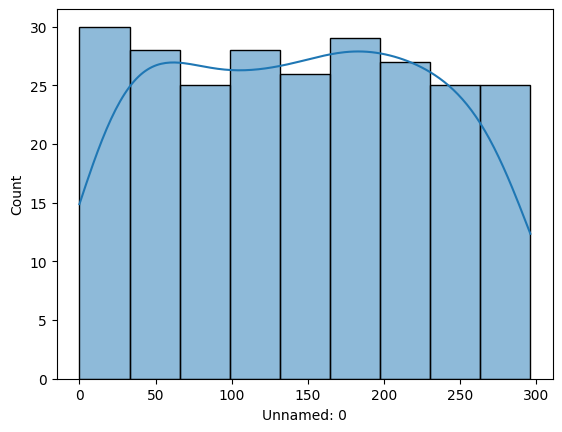

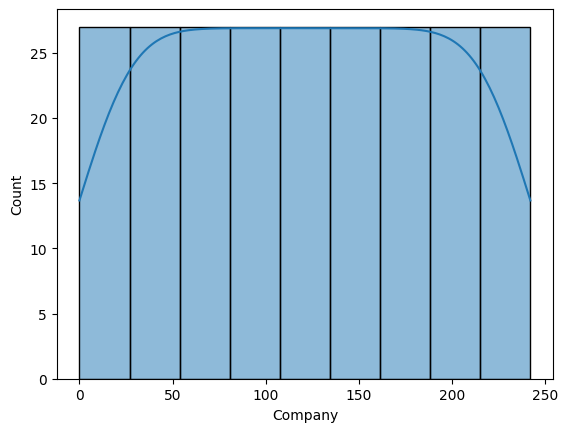

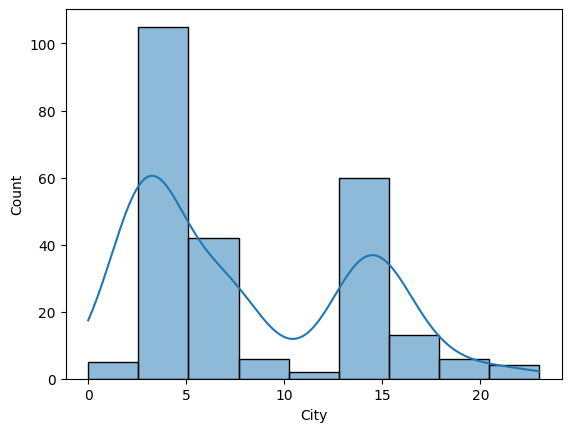

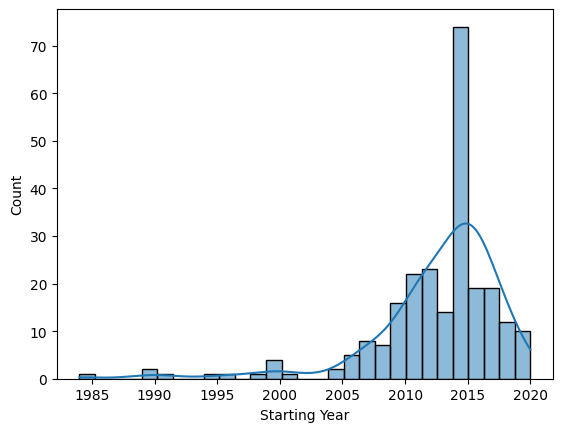

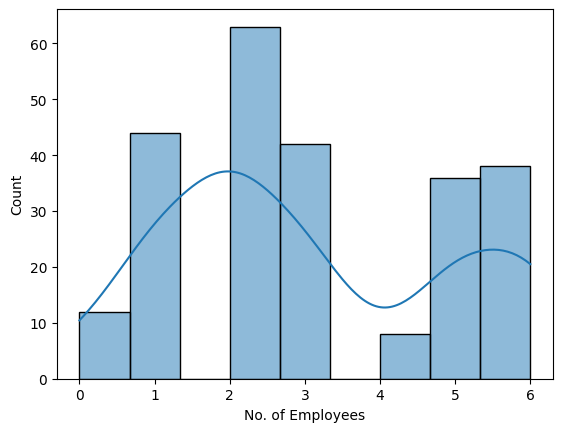

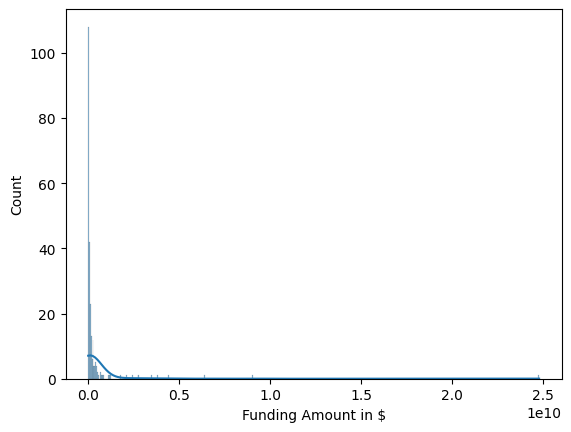

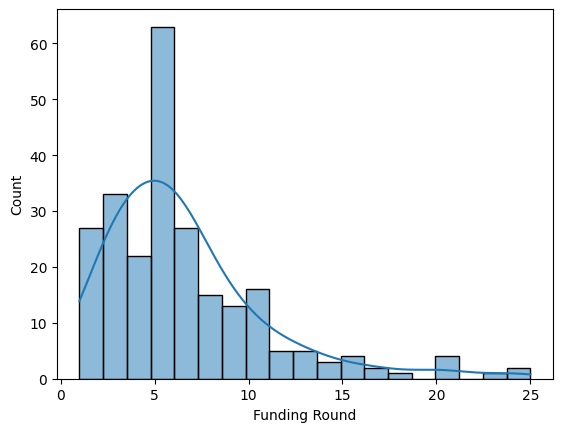

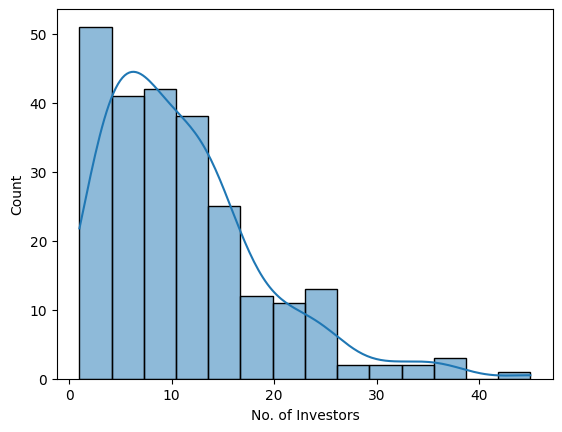

In [ ]:
# Checking distribution of columns which have outliers
for col in columns:
    sns.histplot(x = df[col], kde=True)
    plt.show()

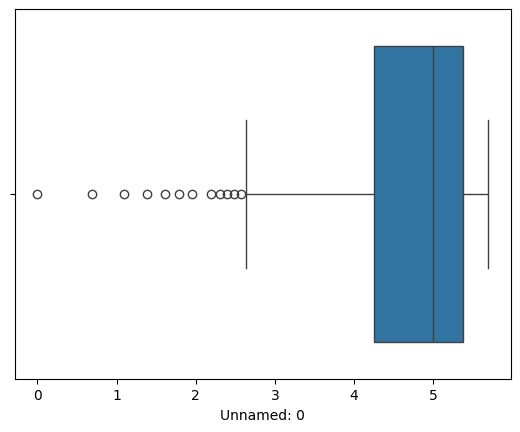

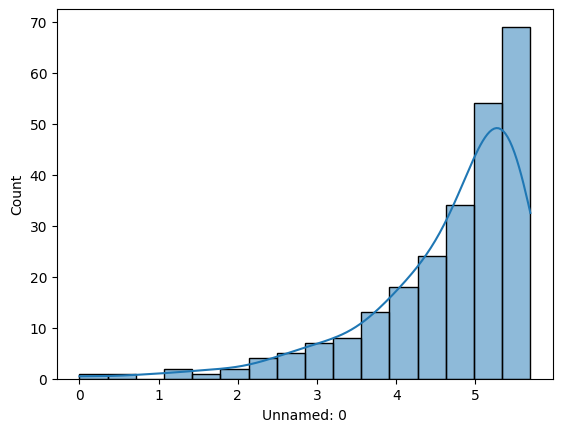

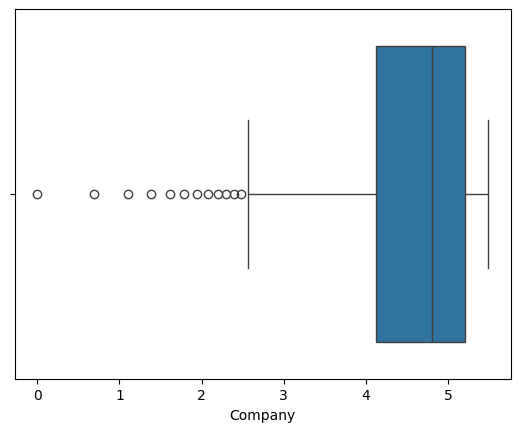

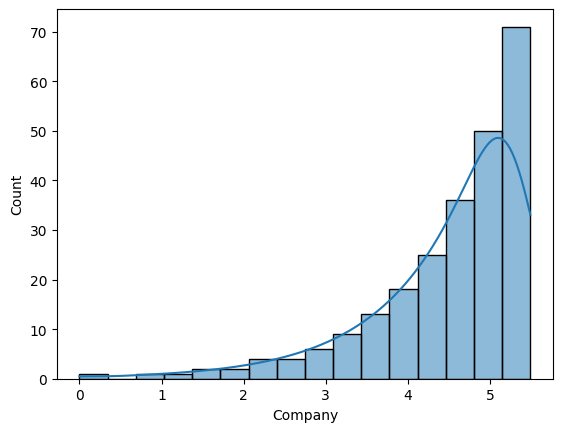

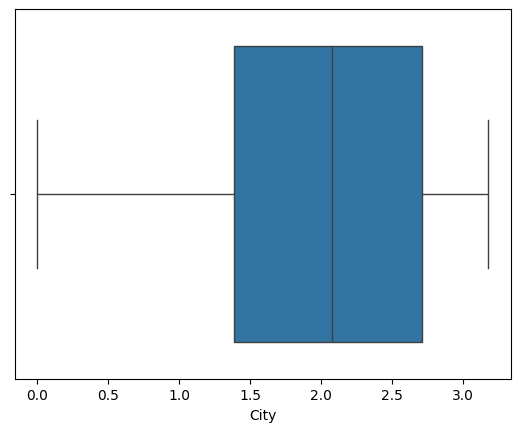

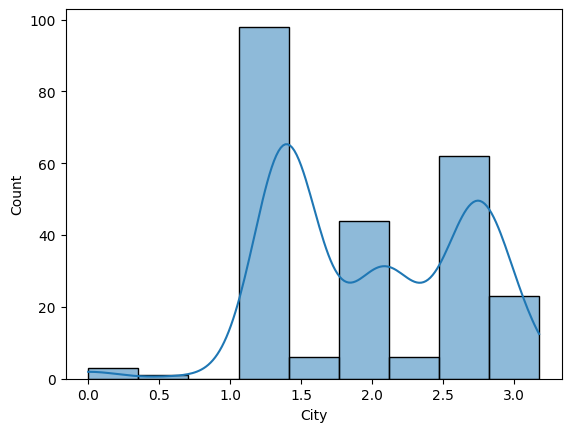

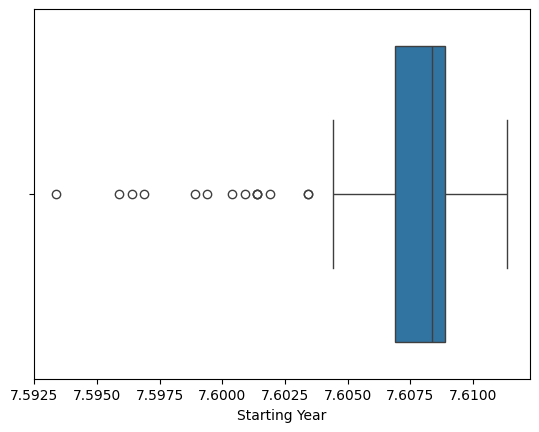

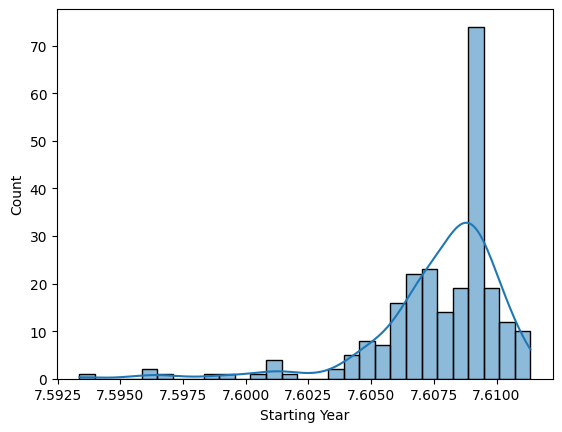

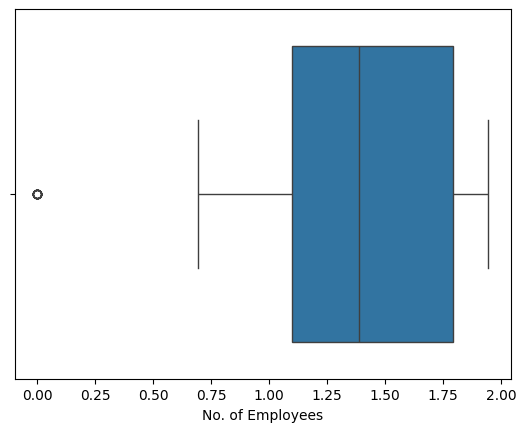

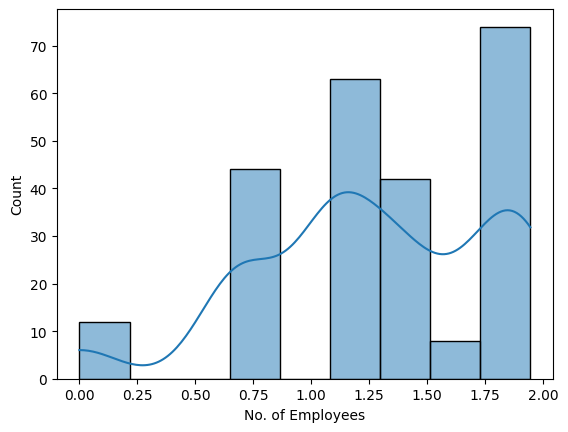

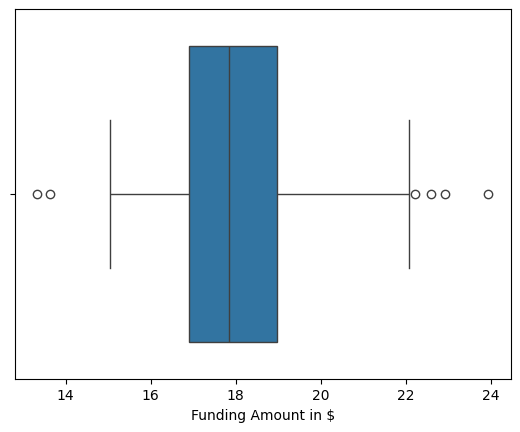

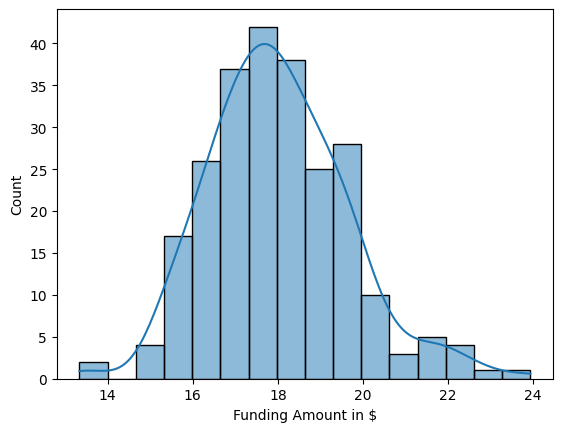

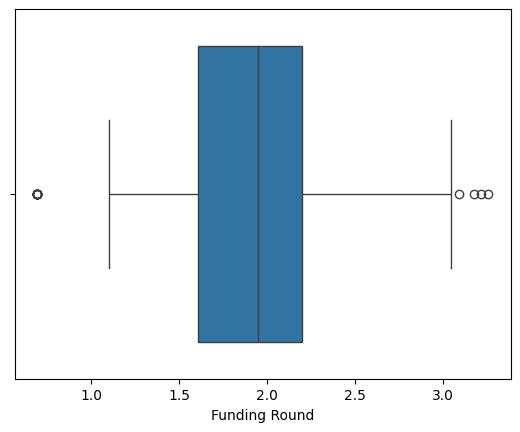

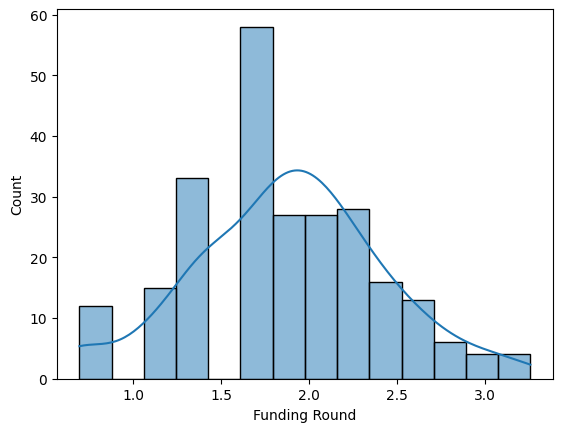

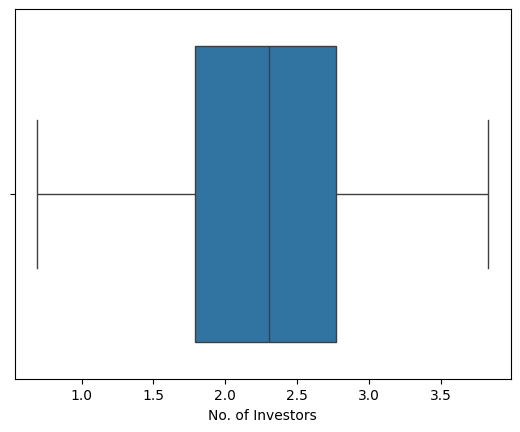

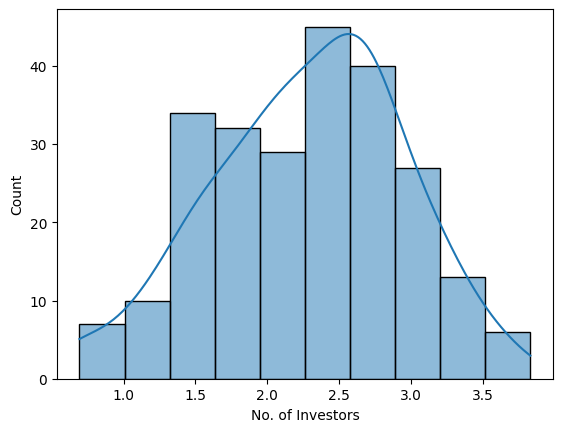

In [ ]:
#fix skewness using log transformation
for col in columns:
    if not (df[col].dtype == 'object'):
        sns.boxplot(x = np.log1p(df[col]))
        plt.show()
        sns.histplot(x = np.log1p(df[col]), kde=True)
        plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

-149.5 434.5


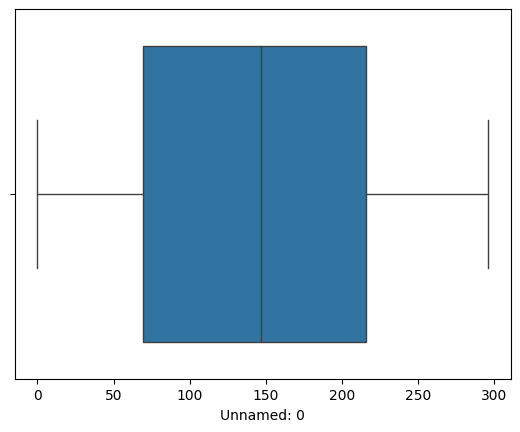

-121.0 363.0


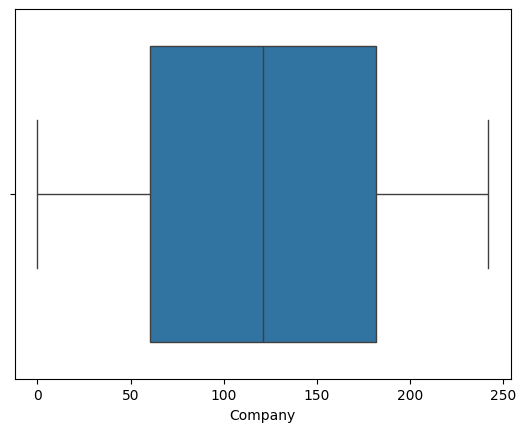

-13.5 30.5


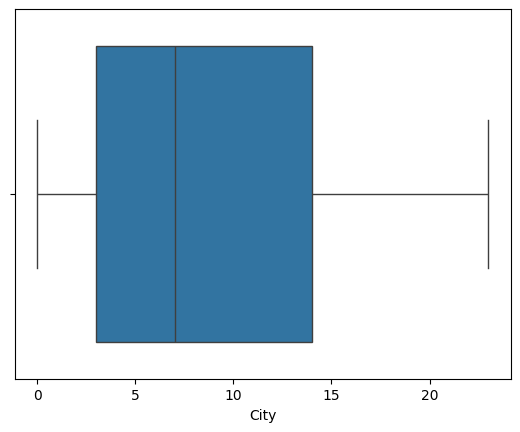

2005.0 2021.0


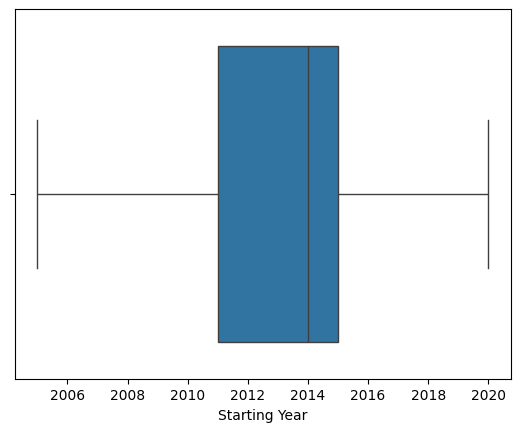

-2.5 9.5


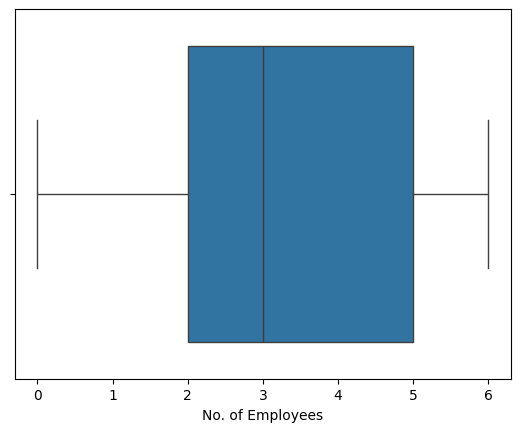

-205015386.0 399768290.0


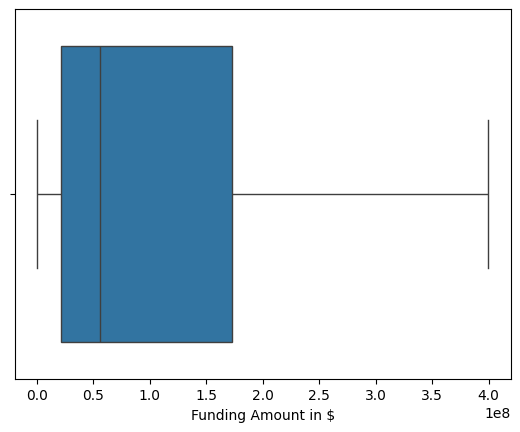

-2.0 14.0


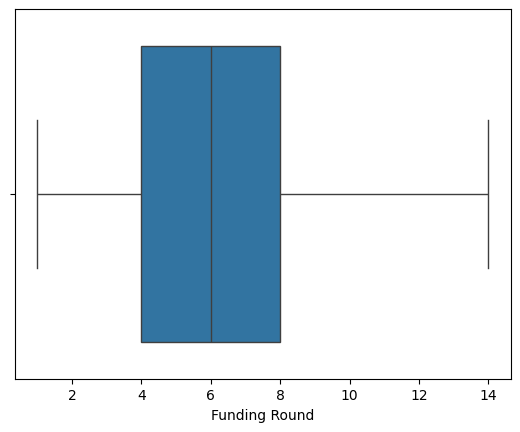

-10.0 30.0


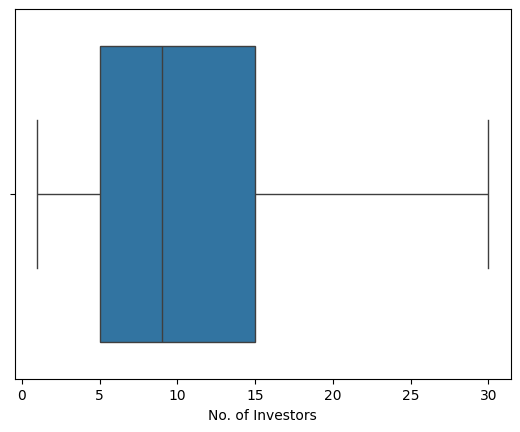

In [ ]:
# 2nd: IQR
# replace outlier of larger than upper_limit with the value of upper limit
# and lower that lower_limit with lower limit
for col in columns:
    lower_limit, upper_limit = remove_outlier(df[col]) #lower and upper range
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    print(lower_limit, upper_limit)
    sns.boxplot(x=df[col])
    plt.show()

# **modeling**

In [ ]:
#Now we have df_SCALED which is a copy of our normal df but scaled as an array
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_SCALED=df.copy()
for col in df_SCALED:
  df_SCALED[col]=scaler.fit_transform(df[[col]])


In [ ]:
#Initial dataset(NO scaling)
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0.0,212.0,7.0,2014.0,1.0,399768290.0,12.0,16.0
1,1.0,36.0,16.0,2018.0,2.0,89506451.0,10.0,20.0
2,2.0,145.0,16.0,2010.0,5.0,32448851.0,4.0,4.0
3,3.0,4.0,14.0,2019.0,2.0,93450000.0,4.0,6.0
4,4.0,168.0,3.0,2014.0,1.0,366600000.0,7.0,29.0


In [ ]:
#scaled dataset
df_SCALED.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,-1.688750,1.297267,-0.191847,0.234487,-1.090681,2.086464,1.632977,0.711281
1,-1.677064,-1.211733,1.415698,1.325022,-0.553084,-0.236414,1.061611,1.268385
2,-1.665377,0.342136,1.415698,-0.856047,1.059709,-0.663595,-0.652485,-0.960029
3,-1.653690,-1.667915,1.058466,1.597656,-0.553084,-0.206890,-0.652485,-0.681477
4,-1.642003,0.670017,-0.906311,0.234487,-1.090681,1.838139,0.204563,2.521867


**1)Kmeans**

Figuring out how many clusters will we be having

In [ ]:
#Getting the value of WCSS for different k's
K=range(2,16)
WCSS = []
for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_SCALED)
    WCSS_iter = kmeans.inertia_
    WCSS.append(WCSS_iter)

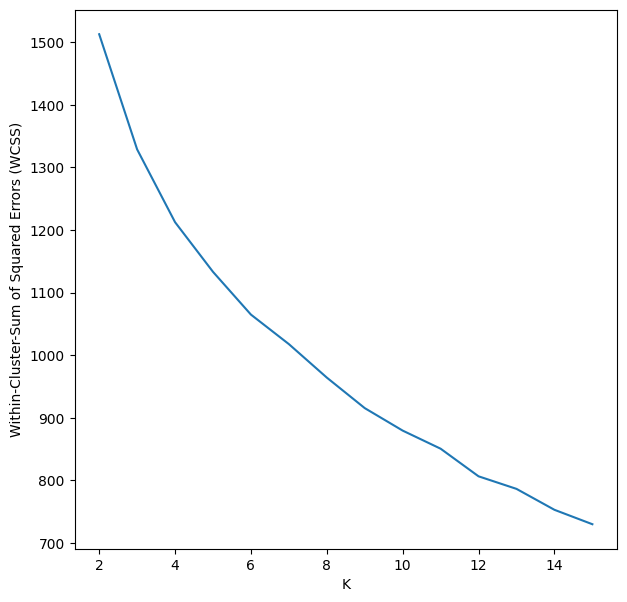

In [ ]:
#ploting to see how many clusters will we have
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.plot(K,WCSS)

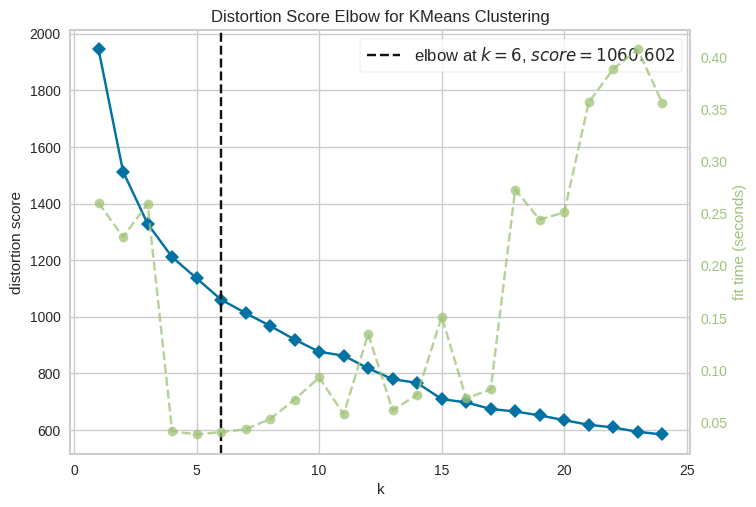

In [ ]:
#as it wasn't clear enough above we needed a visualizer to help us find the best number of clusters
from yellowbrick.cluster import KElbowVisualizer
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,25))
visualizer.fit(df_SCALED)
visualizer.poof()
plt.show()

we have 6 clusters then !

In [ ]:
#Getting the clusters
kmeans = KMeans(n_clusters=6, init='random', max_iter=300,random_state=0)
PredictedClusters= kmeans.fit_predict(df_SCALED)
PredictedClusters

array([4, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 5, 1, 4, 1, 1, 4, 4,
       4, 2, 5, 2, 4, 5, 1, 4, 0, 4, 4, 1, 0, 1, 4, 4, 0, 3, 1, 4, 1, 1,
       4, 4, 0, 5, 0, 3, 0, 5, 1, 1, 1, 1, 0, 2, 0, 1, 4, 4, 1, 4, 1, 3,
       3, 2, 1, 2, 1, 4, 1, 5, 2, 2, 1, 0, 1, 0, 0, 0, 1, 5, 4, 0, 2, 1,
       0, 0, 4, 0, 3, 0, 0, 4, 1, 3, 5, 0, 0, 4, 0, 3, 5, 1, 0, 1, 0, 2,
       4, 1, 2, 2, 2, 3, 0, 0, 4, 4, 1, 5, 3, 0, 0, 3, 0, 0, 0, 4, 5, 5,
       0, 0, 3, 4, 2, 5, 5, 2, 0, 1, 5, 2, 5, 2, 2, 3, 1, 5, 0, 4, 3, 5,
       3, 5, 0, 0, 3, 4, 2, 5, 5, 2, 5, 0, 0, 2, 2, 0, 0, 3, 0, 2, 3, 5,
       5, 0, 2, 3, 5, 0, 0, 5, 0, 2, 0, 0, 2, 5, 5, 5, 0, 3, 0, 2, 0, 0,
       3, 3, 2, 4, 5, 2, 4, 2, 3, 3, 5, 0, 5, 3, 3, 5, 3, 3, 0, 0, 2, 5,
       5, 2, 2, 5, 5, 5, 5, 5, 5, 0, 3, 5, 5, 3, 5, 5, 5, 5, 4, 4, 0, 3,
       3], dtype=int32)

In [ ]:
df["Cluster"]=PredictedClusters
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Cluster
0,0.0,212.0,7.0,2014.0,1.0,399768290.0,12.0,16.0,4
1,1.0,36.0,16.0,2018.0,2.0,89506451.0,10.0,20.0,1
2,2.0,145.0,16.0,2010.0,5.0,32448851.0,4.0,4.0,3
3,3.0,4.0,14.0,2019.0,2.0,93450000.0,4.0,6.0,1
4,4.0,168.0,3.0,2014.0,1.0,366600000.0,7.0,29.0,4


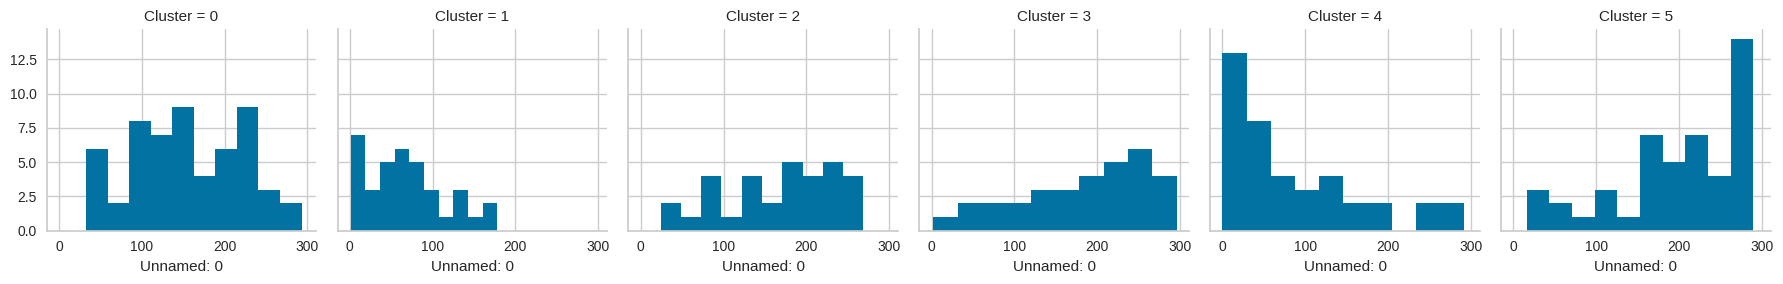

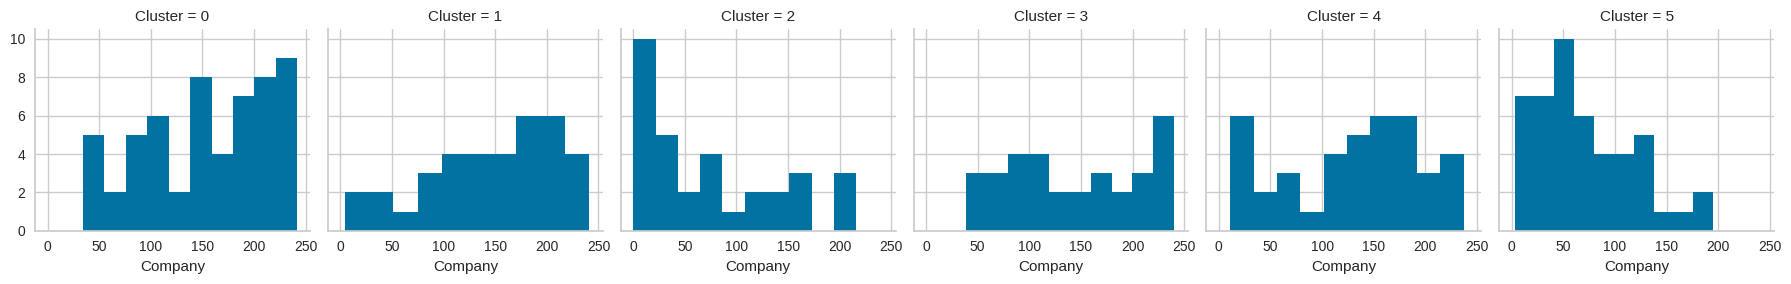

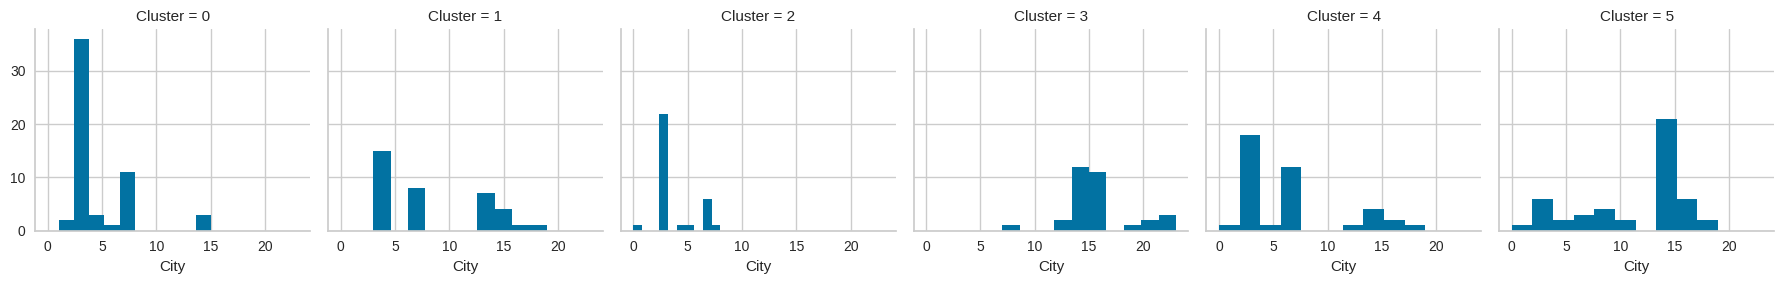

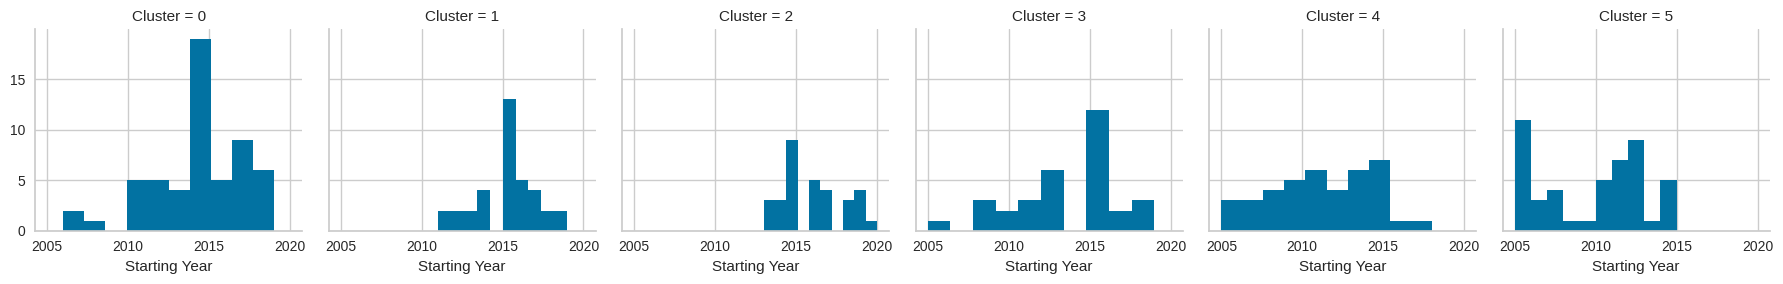

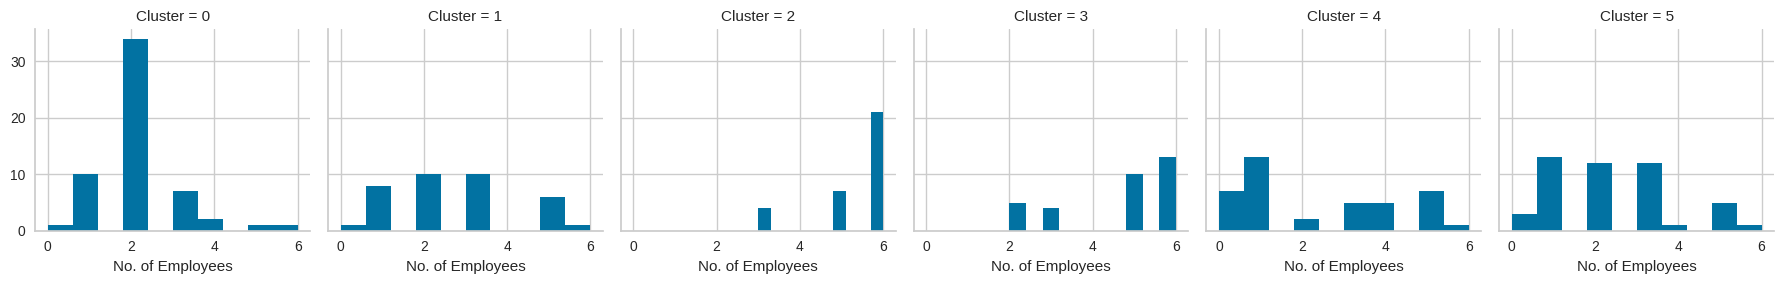

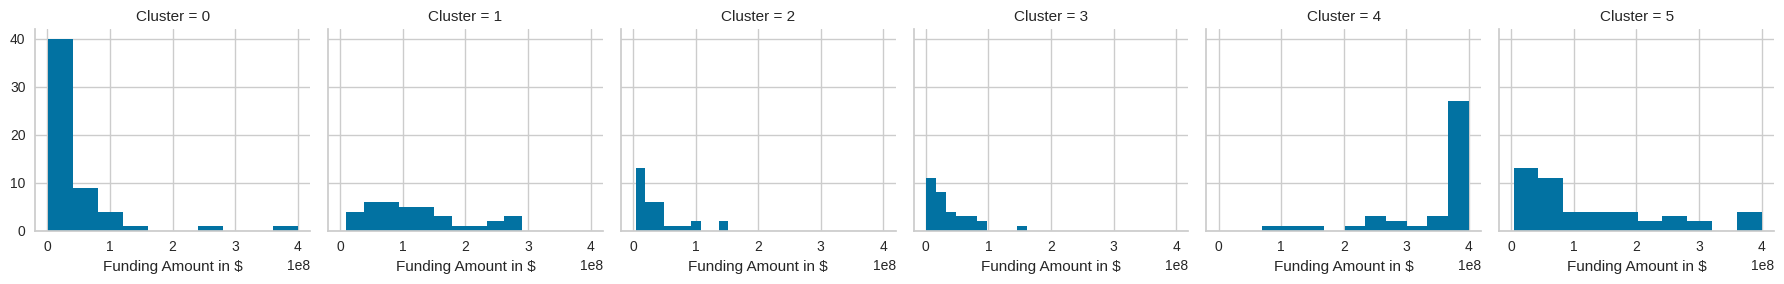

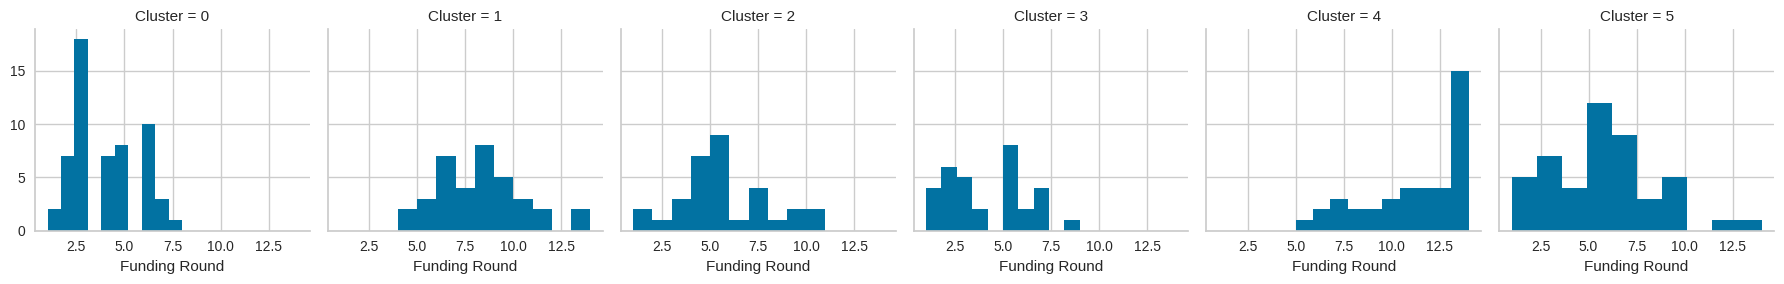

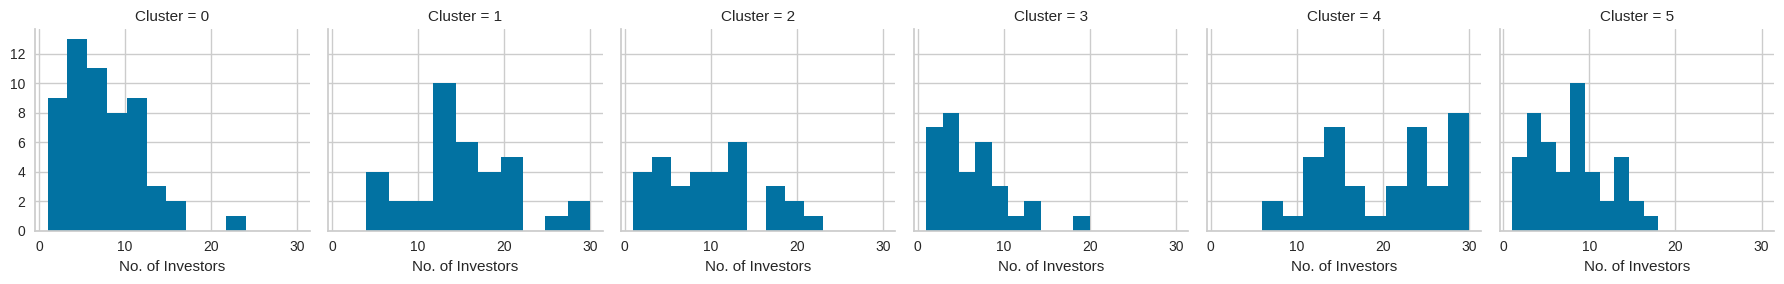

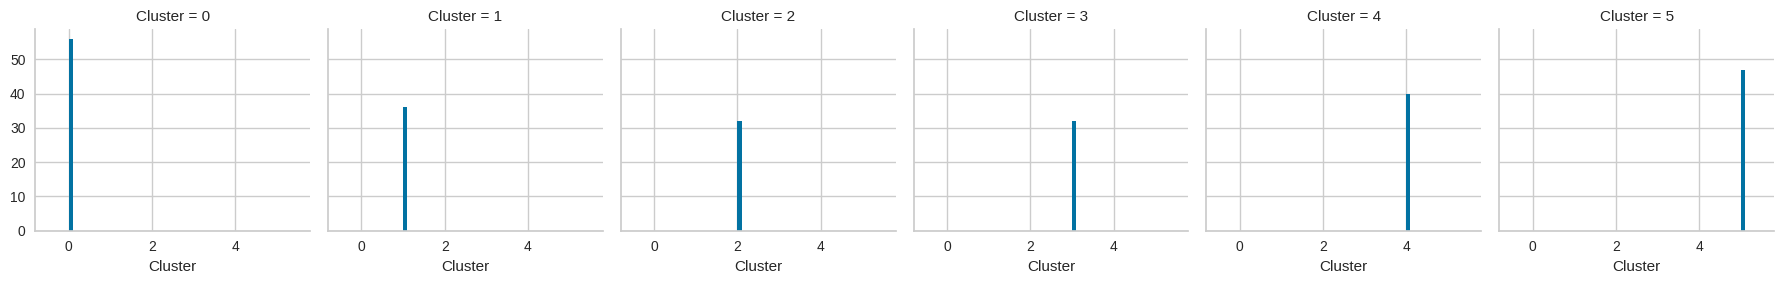

In [ ]:
for c in df:
    grid= sns.FacetGrid(df , col='Cluster')
    grid.map(plt.hist, c)

**2)DBSCAN**

so first we need the data back without the clusters.

In [ ]:
df.drop(['Cluster'],axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0.0,212.0,7.0,2014.0,1.0,399768290.0,12.0,16.0
1,1.0,36.0,16.0,2018.0,2.0,89506451.0,10.0,20.0
2,2.0,145.0,16.0,2010.0,5.0,32448851.0,4.0,4.0
3,3.0,4.0,14.0,2019.0,2.0,93450000.0,4.0,6.0
4,4.0,168.0,3.0,2014.0,1.0,366600000.0,7.0,29.0


In [ ]:
df_SCALED.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,-1.688750,1.297267,-0.191847,0.234487,-1.090681,2.086464,1.632977,0.711281
1,-1.677064,-1.211733,1.415698,1.325022,-0.553084,-0.236414,1.061611,1.268385
2,-1.665377,0.342136,1.415698,-0.856047,1.059709,-0.663595,-0.652485,-0.960029
3,-1.653690,-1.667915,1.058466,1.597656,-0.553084,-0.206890,-0.652485,-0.681477
4,-1.642003,0.670017,-0.906311,0.234487,-1.090681,1.838139,0.204563,2.521867


In [ ]:
#Applying DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 5).fit(df_SCALED) # fitting the model
labels = dbscan.labels_ # getting the labels
df['clusters']=labels

In [ ]:
#Checking how many clusters are there.
df["clusters"].value_counts()

0    243
Name: clusters, dtype: int64

the model grouped all the data into a single cluster

As the data was close to each other and dbscan works by the term of density thats why dbscan won't be a good choice to cluster this data and kmeans would and thats why it considered it all as one cluster .

# Final outcome with kmeans

we will get the data back as it was with kmeans

In [ ]:
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,clusters
0,0.0,212.0,7.0,2014.0,1.0,399768290.0,12.0,16.0,0
1,1.0,36.0,16.0,2018.0,2.0,89506451.0,10.0,20.0,0
2,2.0,145.0,16.0,2010.0,5.0,32448851.0,4.0,4.0,0
3,3.0,4.0,14.0,2019.0,2.0,93450000.0,4.0,6.0,0
4,4.0,168.0,3.0,2014.0,1.0,366600000.0,7.0,29.0,0


In [ ]:
#dropping the clusters of dbscan
df.drop(['clusters'],axis=1,inplace=True)

In [ ]:
#adding kmeans clusters
df["Cluster"]=PredictedClusters

In [ ]:
#final review for the dataset
df.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Cluster
0,0.0,212.0,7.0,2014.0,1.0,399768290.0,12.0,16.0,4
1,1.0,36.0,16.0,2018.0,2.0,89506451.0,10.0,20.0,1
2,2.0,145.0,16.0,2010.0,5.0,32448851.0,4.0,4.0,3
3,3.0,4.0,14.0,2019.0,2.0,93450000.0,4.0,6.0,1
4,4.0,168.0,3.0,2014.0,1.0,366600000.0,7.0,29.0,4
